In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

airbnb_data = pd.read_csv('Airbnb_listings_Austin.csv')

airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1068507,Beautiful Central Austin Home,2690825,Maytal,NaN,78756,30.31,-97.74,Entire home/apt,130,5,3,2016-05-13,0.07,1,275
1,593102,Rosedale's Casa Blanca: ACL/Form 1,2852664,Lori,NaN,78756,30.32,-97.75,Entire home/apt,500,2,2,2013-03-12,0.04,1,357
2,5992071,Central Austin Craftsman Sleeps 4,11709743,Dustin,NaN,78756,30.31,-97.75,Entire home/apt,195,2,7,2016-12-20,0.56,1,341
3,10069609,Charming Rosedale Home Sleeps 12!,50695244,John,NaN,78756,30.31,-97.75,Entire home/apt,300,1,3,2016-06-12,0.25,3,353
4,3689085,Welcome - TajMaSmall Guest Suite,18775364,Just,NaN,78756,30.33,-97.74,Entire home/apt,105,1,122,2017-02-20,4.24,1,331


In [3]:
Kval = 6 # Number of clusters

airbnb_data.isna().sum()


id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group               9663
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3657
reviews_per_month                 3656
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# correl = subset_data.corr()
correl = airbnb_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [6]:
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
cols = ['latitude', 'longitude']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(airbnb_data[cols]), columns = airbnb_data[cols].columns, index = airbnb_data.index)

In [8]:
subset_data.head()

,latitude,longitude
0,0.65,0.21
1,0.73,0.12
2,0.64,0.06
3,0.64,0.08
4,1.04,0.28


In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = Kval, 
           init = 'random', 
           n_init = 10, 
           max_iter = 500, 
           tol = 1e-04, 
           random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

In [10]:
data_km.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
# data_km = data_km.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_km = data_km.merge(subset_data[['latitude', 'longitude']], left_index = True, right_index = True)
data_km.head()

,cluster,latitude,longitude
0,0,0.65,0.21
1,0,0.73,0.12
2,0,0.64,0.06
3,0,0.64,0.08
4,0,1.04,0.28


In [12]:
# pd.set_option('display.max_rows', None)
# data_km.sort_values(by = ['cluster'])

In [13]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['longitude'], y= df['latitude'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

# Added the following for cluster centers
df_cc = pd.DataFrame(km.cluster_centers_)
plot_data.append(go.Scatter(x= df_cc[1], y= df_cc[0], 
                            # text=df["name"], 
                            name = 'cluster center', mode = 'markers'))

layout = go.Layout(xaxis = dict(title='longitude'), yaxis = dict(title= 'latitude'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)
    


KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

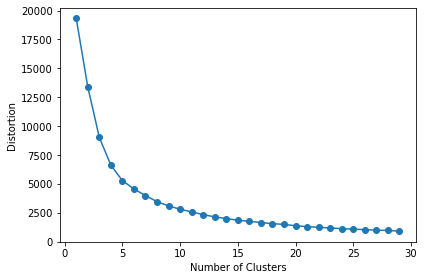

In [14]:
distortions = []
for i in range(1, 30): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(subset_data)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = Kval,  
           affinity = 'euclidean', 
           linkage = 'complete')
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index = subset_data.index)
data_ac.head()

,0
0,2
1,2
2,2
3,2
4,2


In [16]:
data_ac.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_ac = data_ac.merge(subset_data[['latitude', 'longitude']], left_index = True, right_index = True)
data_ac.head()

,cluster,latitude,longitude
0,2,0.65,0.21
1,2,0.73,0.12
2,2,0.64,0.06
3,2,0.64,0.08
4,2,1.04,0.28


In [17]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['longitude'], y= df['latitude'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='longitude'), yaxis = dict(title= 'latitude'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [18]:
# Now let us try by not prescribing number of clusters (the distance hreshold is crucial, selecting 5.0 gives 6 clusters)
ac = AgglomerativeClustering(n_clusters = None,  
                             distance_threshold = 4.0, 
           affinity = 'euclidean', 
           linkage = 'complete')
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index = subset_data.index)
data_ac.head()
data_ac.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_ac = data_ac.merge(subset_data[['latitude', 'longitude']], left_index = True, right_index = True)
data_ac.head()

,0
0,0
1,0
2,0
3,0
4,0


,cluster,latitude,longitude
0,0,0.65,0.21
1,0,0.73,0.12
2,0,0.64,0.06
3,0,0.64,0.08
4,0,1.04,0.28


In [19]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['longitude'], y= df['latitude'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='longitude'), yaxis = dict(title= 'latitude'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [20]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.3,  
           min_samples = 5, 
           metric = 'euclidean')
data_db = pd.DataFrame(db.fit_predict(subset_data), index = subset_data.index)
data_db.head()

,0
0,0
1,0
2,0
3,0
4,0


In [21]:
data_db.rename(columns = {0:'cluster'}, inplace = True)
# data_db = data_db.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_db = data_db.merge(subset_data[['latitude', 'longitude']], left_index = True, right_index = True)
data_db.head()

,cluster,latitude,longitude
0,0,0.65,0.21
1,0,0.73,0.12
2,0,0.64,0.06
3,0,0.64,0.08
4,0,1.04,0.28


In [22]:
plot_data = []
for clus in set(data_db['cluster']):
    df = data_ac[data_db['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['longitude'], y= df['latitude'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='longitude'), yaxis = dict(title= 'latitude'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)